# 📱 Google Play Store Apps — Exploratory Data Analysis

| Field | Details |
|-------|--------|
| **Project Title** | Google Play Store Apps (Regulatory Affairs) |
| **Tools** | Python, Pandas, NumPy, Matplotlib, Seaborn, SciPy |
| **Domain** | Data Analyst & Data Scientist |
| **Difficulty** | Intermediate |

---
## 📌 Objective
Analyze 10,000+ Google Play Store apps to identify market trends, category performance, rating distribution, install patterns, and correlations between key metrics.

---

## Step 1: Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

print('✅ Libraries loaded!')

✅ Libraries loaded!


## Step 2: Load & Explore Dataset

In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv('googleplaystore (1).csv')

print(f'Shape: {df.shape}')
print(f'Columns: {list(df.columns)}')
df.head(4)

Shape: (10841, 13)
Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [10]:
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')
df.info()

Rows: 10841, Columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Step 3: Data Cleaning

### 3.1 Remove Corrupted Row

In [12]:
# Row 10472 has incorrect data — remove it
print('Problematic row:')
print(df.iloc[10472])
df.drop(10472, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
print(f'\nShape after removing bad row: {df.shape}')

Problematic row:
App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

Shape after removing bad row: (10840, 13)


### 3.2 Convert Data Types

In [13]:
# REVIEWS → integer
df['Reviews'] = df['Reviews'].astype('int')

# SIZE → bytes
def convert_into_bytes(col):
    if isinstance(col, str):
        if 'k' in col:
            return float(col.replace('k', '')) * 1024
        elif 'M' in col:
            return float(col.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in col:
            return np.nan
    return col

df['Size_in_bytes'] = df['Size'].apply(convert_into_bytes)
df['Size_MB']       = df['Size_in_bytes'] / (1024 * 1024)

print(f'Size column - M: {df["Size"].str.contains("M", na=False).sum()}')
print(f'Size column - k: {df["Size"].str.contains("k", na=False).sum()}')
print(f'Varies with device: {df["Size"].str.contains("Varies", na=False).sum()}')

Size column - M: 8829
Size column - k: 316
Varies with device: 1695


In [14]:
# INSTALLS → integer
def clean_installs(install):
    if isinstance(install, str):
        return install.replace('+', '').replace(',', '')
    return install

df['Installs'] = df['Installs'].apply(clean_installs).astype('int')

# PRICE → float
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype('float')

# INSTALLS CATEGORY
bins   = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['no', 'Very low', 'Low', 'Moderate',
          'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

print('Installs category distribution:')
print(df['Installs_category'].value_counts())

Installs category distribution:
Installs_category
Low                   2161
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64


### 3.3 Handle Missing Values

In [15]:
# Missing values summary
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
print(pd.DataFrame({'Missing': missing, 'Percentage %': missing_pct})[missing > 0])

               Missing  Percentage %
Size_in_bytes     1695         15.64
Size_MB           1695         15.64
Rating            1474         13.60
Current Ver          8          0.07
Android Ver          2          0.02
Type                 1          0.01


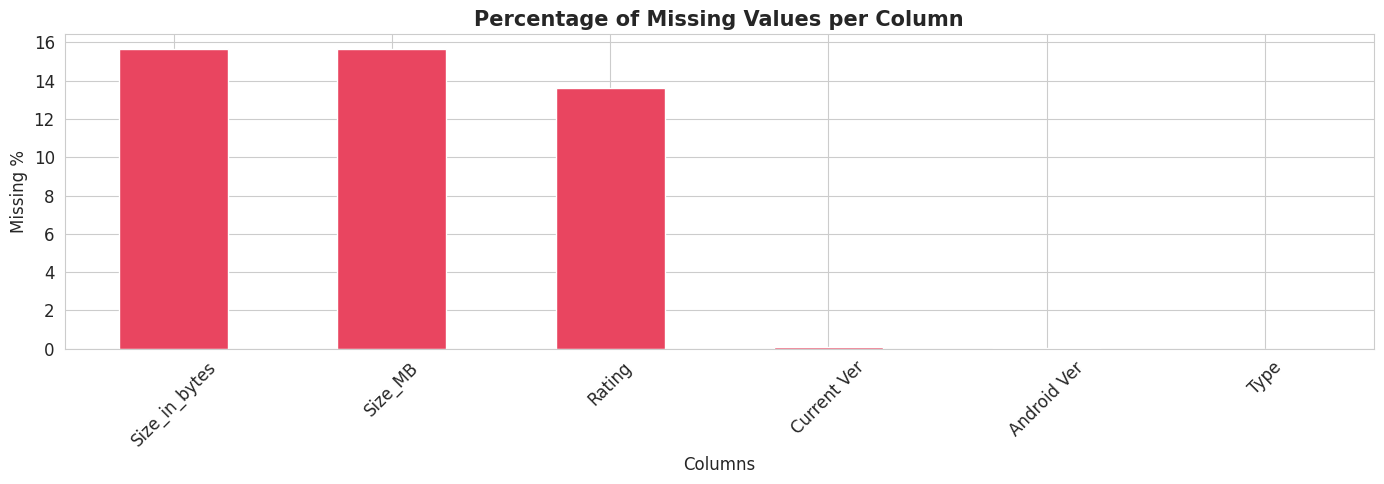

In [16]:
# Visualize missing values
plt.figure(figsize=(14, 5))
missing_pct[missing_pct > 0].plot(kind='bar', color='#E94560')
plt.title('Percentage of Missing Values per Column', fontsize=15, fontweight='bold')
plt.xlabel('Columns')
plt.ylabel('Missing %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('playstore_missing_values.png', dpi=150, bbox_inches='tight')
plt.show()

In [17]:
# Drop rows with few missing values in critical columns
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'],
          inplace=True)

# Impute Rating by Installs_category group mean
def fill_missing_ratings(df, category, fill_value):
    mask = (df['Installs_category'] == category) & df['Rating'].isnull()
    df.loc[mask, 'Rating'] = fill_value
    return df

group_means = df.groupby('Installs_category')['Rating'].mean().to_dict()
for cat, mean_val in group_means.items():
    df = fill_missing_ratings(df, cat, round(mean_val, 4))

print(f'Remaining nulls in Rating: {df["Rating"].isnull().sum()}')

Remaining nulls in Rating: 14


### 3.4 Remove Duplicates

In [18]:
before = len(df)
df.drop_duplicates(inplace=True)
after  = len(df)
print(f'Duplicates removed: {before - after}')
print(f'Final dataset size: {after} rows')
df.describe()

Duplicates removed: 483
Final dataset size: 10346 rows


,Rating,Reviews,Installs,Price,Size_in_bytes,Size_MB
count,10332.000000,1.034600e+04,1.034600e+04,10346.000000,8.821000e+03,8821.000000
mean,4.204620,4.063338e+05,1.417266e+07,1.031561,2.234121e+07,21.306240
std,0.493477,2.698179e+06,8.028090e+07,16.287252,2.364101e+07,22.545826
min,1.000000,0.000000e+00,0.000000e+00,0.000000,8.704000e+03,0.008301
25%,4.093300,3.200000e+01,1.000000e+03,0.000000,4.928307e+06,4.700000
50%,4.300000,1.688500e+03,1.000000e+05,0.000000,1.363149e+07,13.000000
75%,4.500000,4.659825e+04,1.000000e+06,0.000000,3.040870e+07,29.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,1.048576e+08,100.000000


## Step 4: Exploratory Data Analysis

### 4.1 Category with Most Apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64


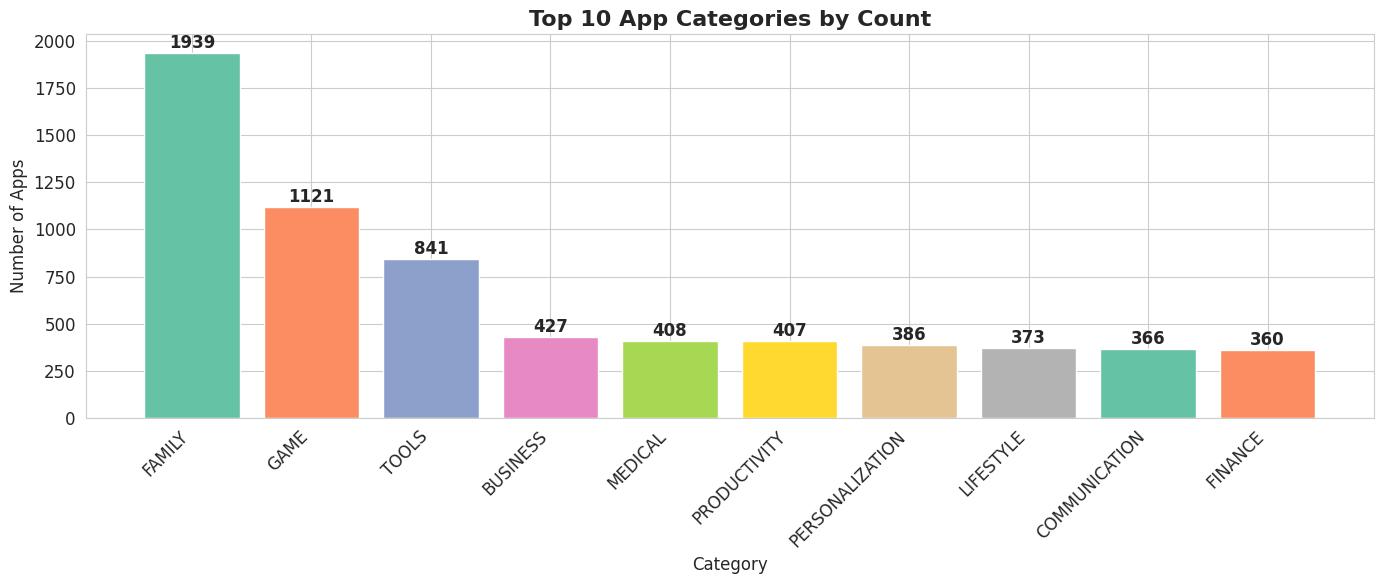

In [19]:
top_categories = df['Category'].value_counts().head(10)
print(top_categories)

plt.figure(figsize=(14, 6))
bars = plt.bar(top_categories.index, top_categories.values,
               color=sns.color_palette('Set2', 10))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Top 10 App Categories by Count', fontsize=16, fontweight='bold')
for bar, v in zip(bars, top_categories.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.savefig('playstore_top_categories.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.2 Category with Most Installs

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64


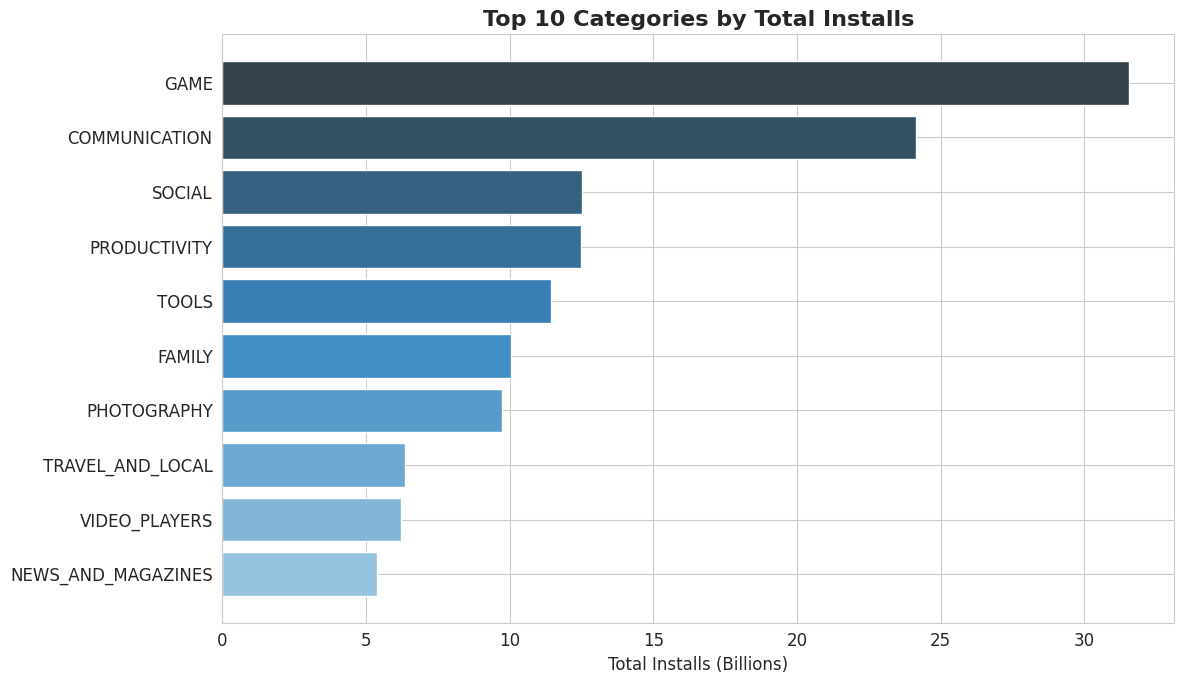

In [20]:
top_installs = (df.groupby('Category')['Installs']
                .sum().sort_values(ascending=False).head(10))
print(top_installs)

plt.figure(figsize=(12, 7))
plt.barh(top_installs.index[::-1], top_installs.values[::-1] / 1e9,
         color=sns.color_palette('Blues_d', 10))
plt.xlabel('Total Installs (Billions)')
plt.title('Top 10 Categories by Total Installs', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('playstore_installs_by_category.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.3 Category with Highest Rating

Category
EVENTS                 4.394
EDUCATION              4.374
ART_AND_DESIGN         4.367
BOOKS_AND_REFERENCE    4.358
PERSONALIZATION        4.333
GAME                   4.282
HEALTH_AND_FITNESS     4.274
SOCIAL                 4.260
PARENTING              4.260
SHOPPING               4.253
Name: Rating, dtype: float64


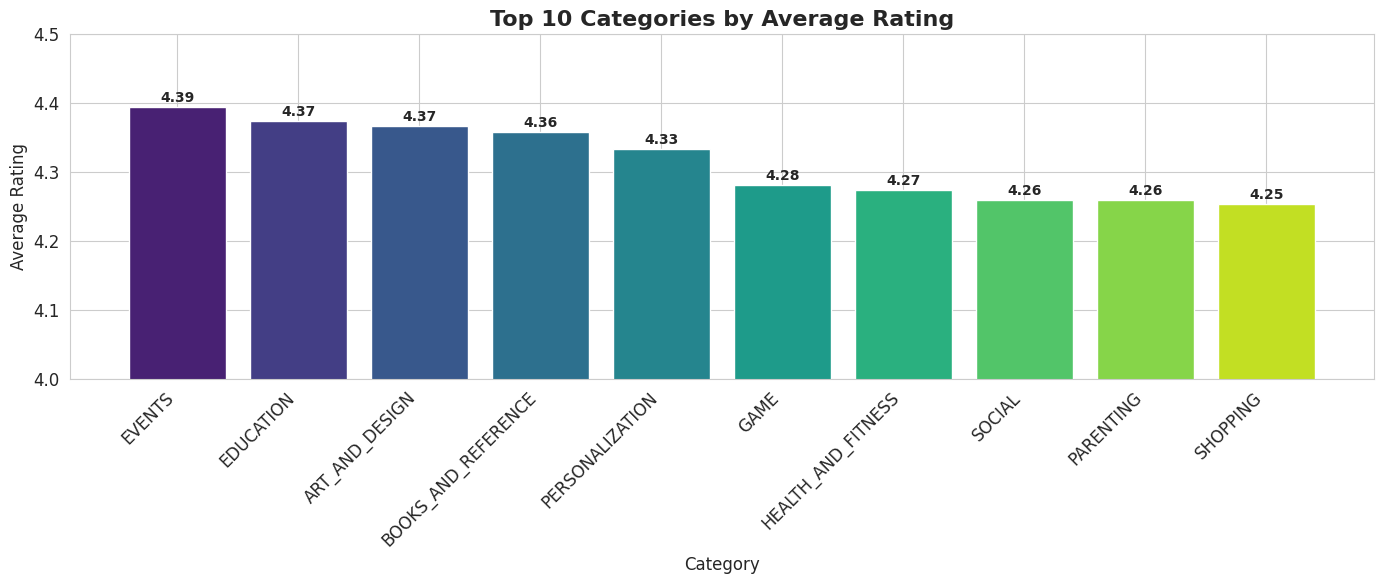

In [21]:
top_rated = (df.groupby('Category')['Rating']
             .mean().sort_values(ascending=False).head(10))
print(top_rated.round(3))

plt.figure(figsize=(14, 6))
bars = plt.bar(top_rated.index, top_rated.values,
               color=sns.color_palette('viridis', 10))
plt.xticks(rotation=45, ha='right')
plt.ylim(4.0, 4.5)
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Top 10 Categories by Average Rating', fontsize=16, fontweight='bold')
for bar, v in zip(bars, top_rated.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.003,
             f'{v:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.savefig('playstore_avg_rating.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.4 Rating Distribution

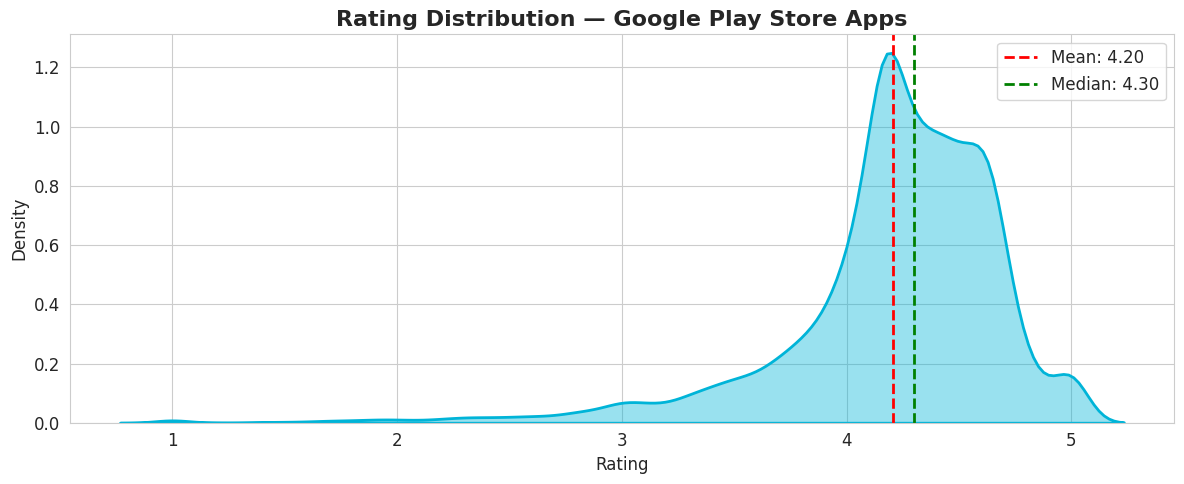

In [22]:
plt.figure(figsize=(12, 5))
sns.kdeplot(df['Rating'], color='#00B4D8', fill=True, alpha=0.4, linewidth=2)
plt.axvline(df['Rating'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Mean: {df["Rating"].mean():.2f}')
plt.axvline(df['Rating'].median(), color='green', linestyle='--',
            linewidth=2, label=f'Median: {df["Rating"].median():.2f}')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Rating Distribution — Google Play Store Apps', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('playstore_rating_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.5 Free vs Paid Apps

Type
Free    9584
Paid     762
Name: count, dtype: int64


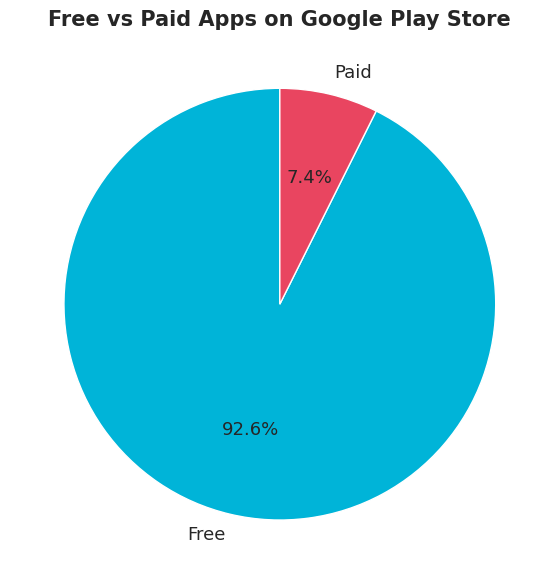

In [23]:
type_counts = df['Type'].value_counts()
print(type_counts)

plt.figure(figsize=(6, 6))
plt.pie(type_counts.values, labels=type_counts.index,
        autopct='%.1f%%', colors=['#00B4D8', '#E94560'],
        startangle=90, textprops={'fontsize': 13})
plt.title('Free vs Paid Apps on Google Play Store',
          fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('playstore_free_vs_paid.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.6 Correlation Analysis

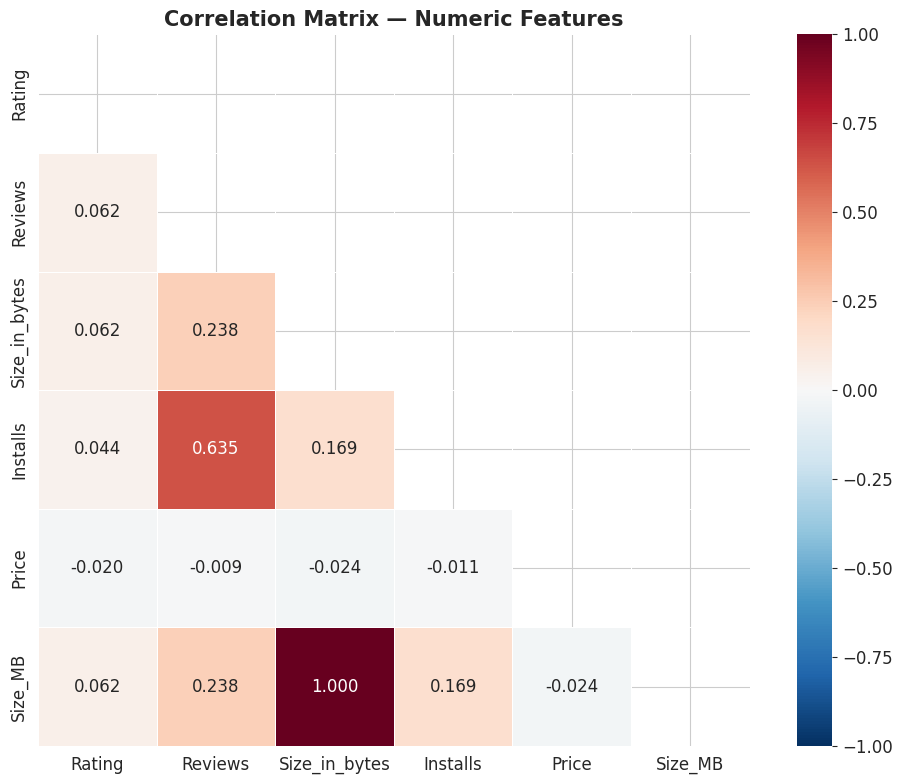


Pearson R (Reviews vs Installs): 0.6350  (p-value: 0.00e+00)
→ Strong positive correlation — more reviews = more installs


In [24]:
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_MB']
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt='.3f', cmap='RdBu_r',
            mask=mask, vmin=-1, vmax=1,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix — Numeric Features', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('playstore_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

# Pearson R — Reviews vs Installs
df_clean = df.dropna(subset=['Reviews', 'Installs'])
r, p = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"\nPearson R (Reviews vs Installs): {r:.4f}  (p-value: {p:.2e})")
print('→ Strong positive correlation — more reviews = more installs')

### 4.7 Installs vs Reviews — Scatter Plot

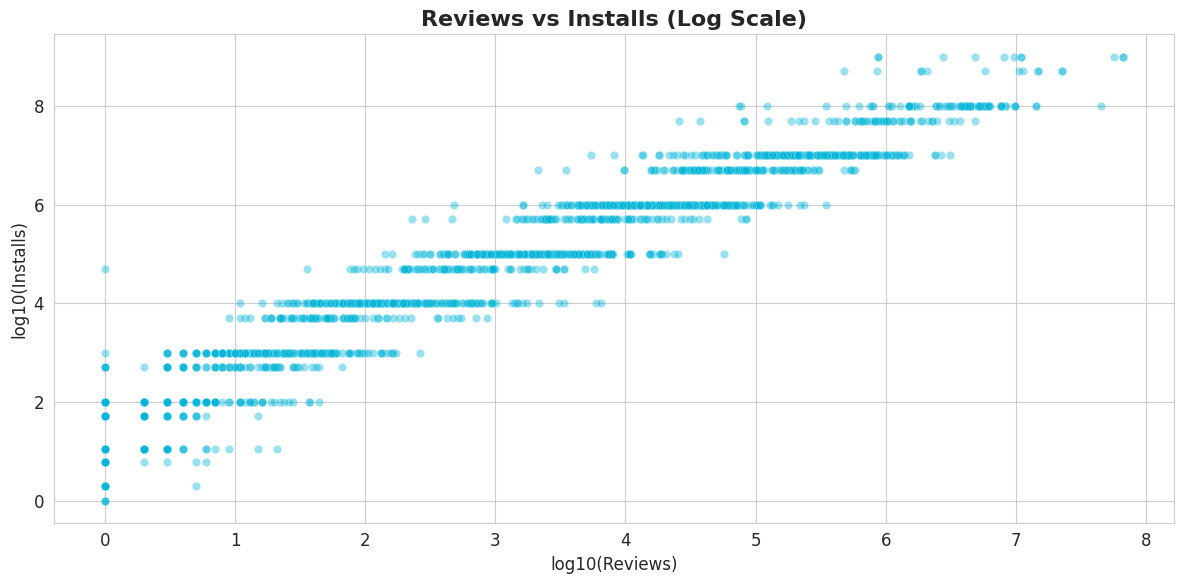

In [25]:
sample = df.dropna(subset=['Reviews', 'Installs']).sample(2000, random_state=42)

plt.figure(figsize=(12, 6))
plt.scatter(np.log10(sample['Reviews'] + 1),
            np.log10(sample['Installs'] + 1),
            alpha=0.4, color='#00B4D8', edgecolors='white', linewidth=0.3)
plt.xlabel('log10(Reviews)')
plt.ylabel('log10(Installs)')
plt.title('Reviews vs Installs (Log Scale)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('playstore_scatter.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.8 Rating Boxplot by Installs Category

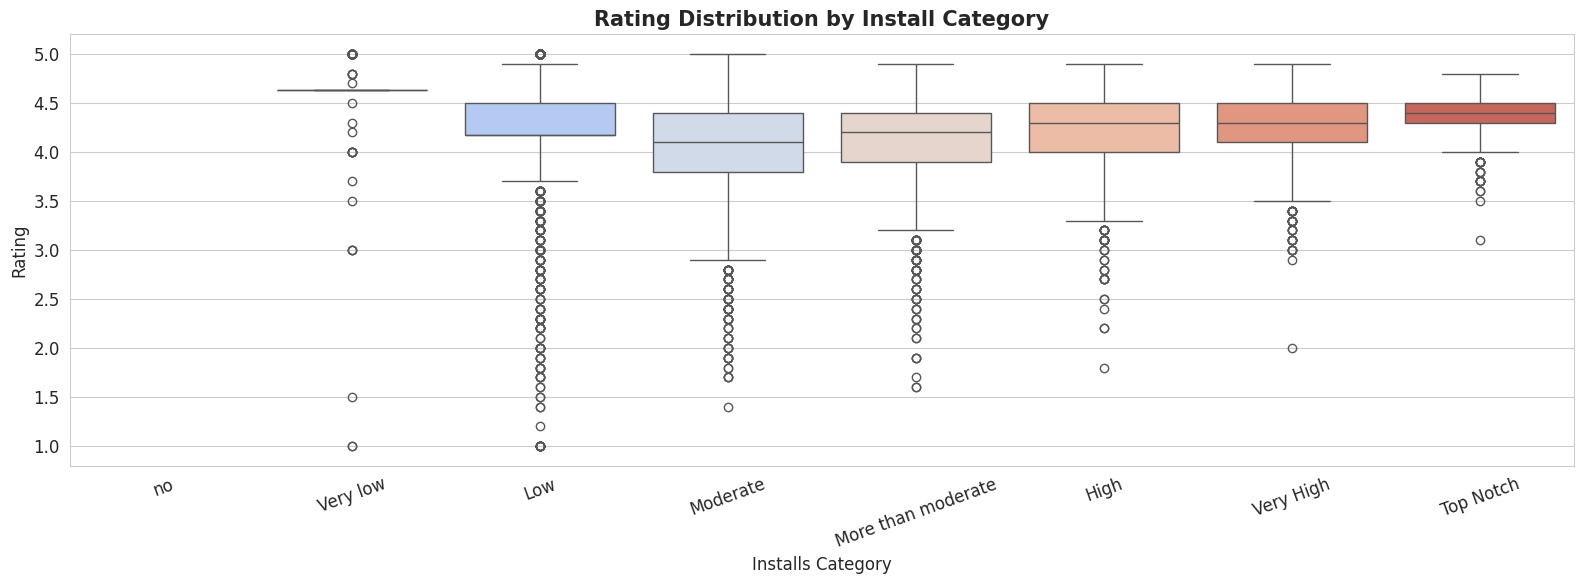

In [26]:
order = ['no', 'Very low', 'Low', 'Moderate',
         'More than moderate', 'High', 'Very High', 'Top Notch']

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Installs_category', y='Rating',
            order=order, palette='coolwarm')
plt.xlabel('Installs Category')
plt.ylabel('Rating')
plt.title('Rating Distribution by Install Category', fontsize=15, fontweight='bold')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('playstore_rating_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()

## Step 5: Key Insights & Conclusions

---

| # | Insight |
|---|--------|
| 1 | 📦 **FAMILY** is the most populated category with 1,939 apps |
| 2 | 🎮 **GAME** dominates installs (31.5B) and reviews (1.4B) |
| 3 | ⭐ **EVENTS** category has the highest average rating (4.39) |
| 4 | 🆓 **93%+** of apps on the Play Store are FREE |
| 5 | 🔗 Reviews & Installs have **Pearson R = 0.63** — strong correlation |
| 6 | 📊 Mean rating across all apps is **4.19 / 5.0** |
| 7 | 🗑️ **483 duplicates** removed during data cleaning |

--*Project by: Unified Mentor Internship Program*